# Project 1, Part 4, Holiday Analytics

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Stephanie Cabanela

Year: 2022

Semester: Spring

Section: 7


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import datetime

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Source for this cell: Lab 2

#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# Connect to Postgres database
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# Create a cursor for the connection
cursor = connection.cursor()

## How do holidays affect the sales, considering both the actual holiday, and the days before and after the holiday? 

## Create an executive summary explaining how holidays have affected sales. 

## You must support your summary with data, in the form of output of queries, data visualization, etc. There is a 1 query minimum.

# Exploratory Data Analysis (EDA)

## What year is our data in?

In [3]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date
from sales
order by sale_date desc
limit 10

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,sale_date
0,2020-12-31
1,2020-12-31
2,2020-12-31
3,2020-12-31
4,2020-12-31
5,2020-12-31
6,2020-12-31
7,2020-12-31
8,2020-12-31
9,2020-12-31


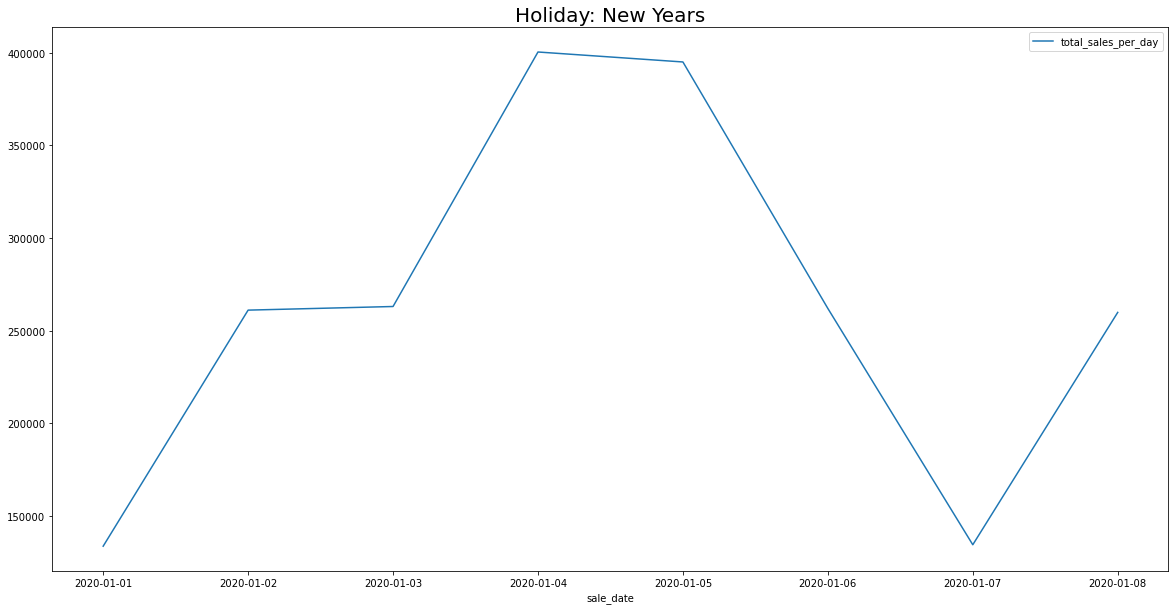

In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date, 
        to_char(sale_date, 'Day') as day_name,
        sale_date || ' (' || to_char(sale_date, 'Day') || ')' as display,
        sum(total_amount) as total_sales_per_day

from sales
where sale_date between '2020-01-01' and (date('2020-01-01') + '1 week'::interval)
group by sale_date

"""

df_new_years = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_new_years
df_new_years.plot(x='sale_date', y='total_sales_per_day', figsize=(20,10))
plt.title('Holiday: New Years', fontsize=20)
plt.show()

In [5]:
holidays_data = {'Holiday':['New Years', 'Birthday of Martin Luther King, Jr.', 'Valentine\'s Day', 'Washington\'s Birthday', 'Mother\'s Day', 'Memorial Day', 'Father\'s Day', 'Independence Day', 'Labor Day', 'Columbus Day', 'Halloween', 'Veterans Day', 'Thanksgiving Day', 'Christmas Day'],
           'Date':['2020-01-01', '2020-01-20', '2020-02-14', '2020-02-17', '2020-05-10', '2020-05-25', '2020-06-21', '2020-07-04', '2020-09-07', '2020-10-12', '2020-10-31', '2020-11-11', '2020-11-26', '2020-12-25']}
holidays_df = pd.DataFrame(holidays_data)
holidays_df

,Holiday,Date
0,New Years,2020-01-01
1,"Birthday of Martin Luther King, Jr.",2020-01-20
2,Valentine's Day,2020-02-14
3,Washington's Birthday,2020-02-17
4,Mother's Day,2020-05-10
5,Memorial Day,2020-05-25
6,Father's Day,2020-06-21
7,Independence Day,2020-07-04
8,Labor Day,2020-09-07
9,Columbus Day,2020-10-12


IndexError: index 0 is out of bounds for axis 0 with size 0

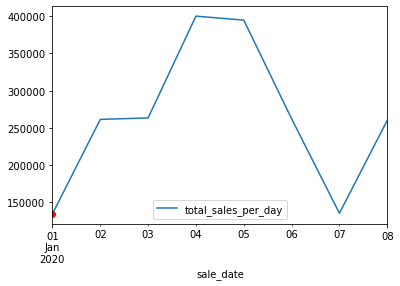

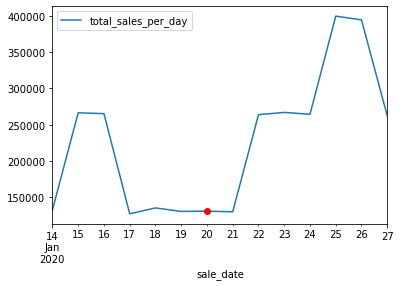

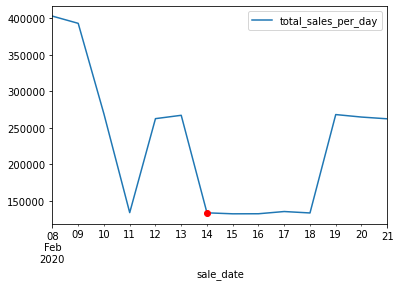

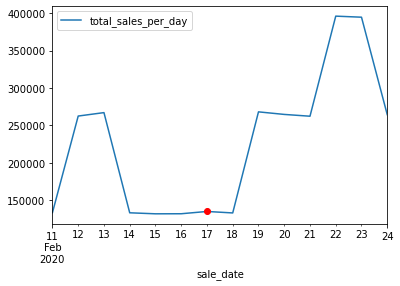

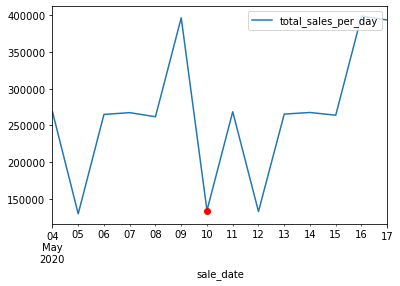

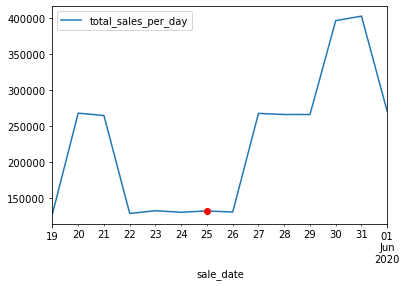

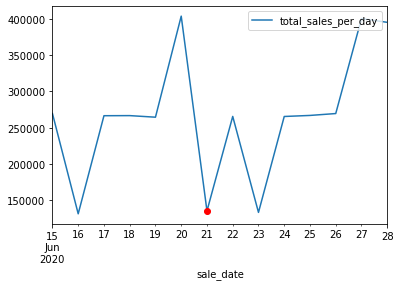

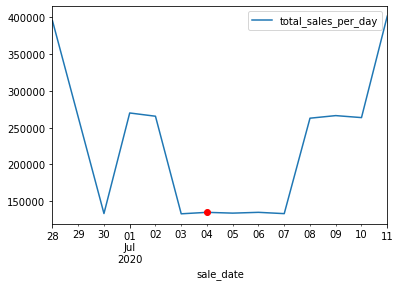

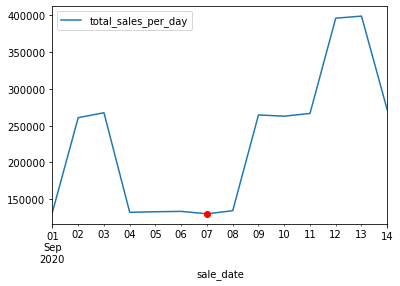

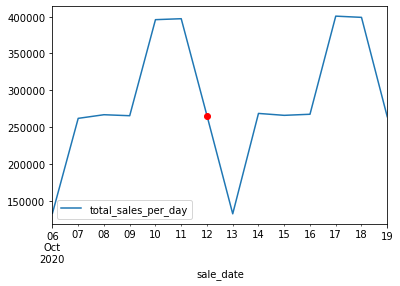

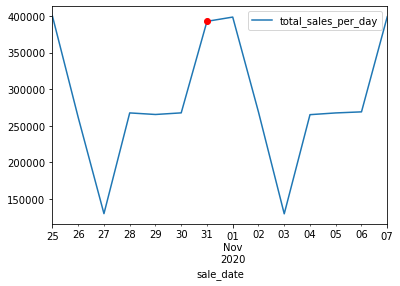

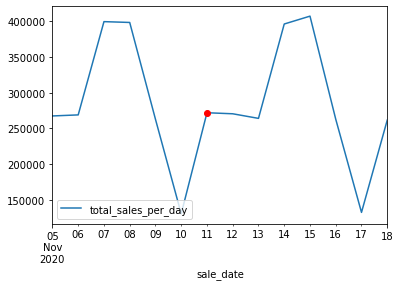

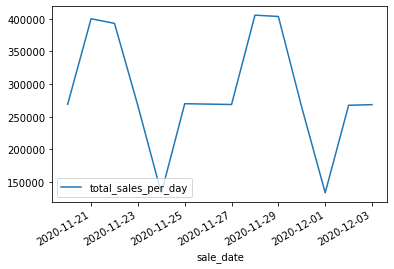

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date, 
        to_char(sale_date, 'DY') as day_name,
        sale_date || ' (' || to_char(sale_date, 'DY') || ')' as display,
        sum(total_amount) as total_sales_per_day

from sales
group by sale_date

"""

# my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

# where sale_date between (date('2020-01-20') - '1 week'::interval) and (date('2020-01-20') + '1 week'::interval)
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df['sale_date']=pd.to_datetime(df['sale_date'])


holidays = holidays_df['Date'].tolist()

# plt.figure(figsize=(20,30))
for holiday_string in holidays:
    holiday_date = datetime.datetime.strptime(holiday_string, '%Y-%m-%d')
    start_date = holiday_date + datetime.timedelta(days=-7)
    end_date = holiday_date + datetime.timedelta(days=7)
    mask = (df['sale_date'] > start_date) & (df['sale_date'] <= end_date)
    temp_df = df.loc[mask]
    temp_df.plot(x='sale_date', y='total_sales_per_day')
#     temp_df.plot(x='sale_date', y='total_sales_per_day', figsize=(15,10))
    holiday_sales = df.loc[df.sale_date == holiday_date,'total_sales_per_day'].values[0]
    plt.plot(holiday_date,holiday_sales,'ro')
plt.show()

# holiday_date = datetime.datetime.strptime(holiday_string, '%Y-%m-%d')
# start_date = holiday_date + datetime.timedelta(days=-7)
# end_date = holiday_date + datetime.timedelta(days=7)
# mask = (df['sale_date'] > start_date) & (df['sale_date'] <= end_date)
# temp_df = df.loc[mask]
# temp_df

# df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
# df['sale_date']=pd.to_datetime(df['sale_date'])


# holidays = ['2020-01-01', '2020-02-14']

# plt.figure(figsize=(20,10))
# for holiday_string in holidays:
#     holiday_date = datetime.datetime.strptime(holiday_string, '%Y-%m-%d')
#     start_date = holiday_date + datetime.timedelta(days=-7)
#     end_date = holiday_date + datetime.timedelta(days=7)
#     mask = (df['sale_date'] > start_date) & (df['sale_date'] <= end_date)
#     temp_df = df.loc[mask]
#     plt.plot(temp_df['sale_date'].tolist(), temp_df['total_sales_per_day'].tolist())
# plt.show()

# df['sale_date']=pd.to_datetime(df['sale_date'])
# holiday_string = '2020-01-01'
# holiday_date = datetime.datetime.strptime(holiday_string, '%Y-%m-%d')
# start_date = holiday_date + datetime.timedelta(days=-7)
# end_date = holiday_date + datetime.timedelta(days=7)
# mask = (df['sale_date'] > start_date) & (df['sale_date'] <= end_date)
# df.loc[mask]
# df = df.set_index(['sale_date'])
# # daterange = (df['sale_date'] > pd.to_datetime(2020,1,3) + pd.DateOffset(1))
# # df[daterange]

In [ ]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from holidays

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sale_date) as day_number,
        to_char(sale_date, 'Day') as day_name,
        avg(total_amount) as expected_sales
from sales
group by day_number, day_name
order by day_number

"""


my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,day_number,day_name,average_sales_dollars
0,0,Sunday,64.129203
1,1,Monday,64.261306
2,2,Tuesday,64.149784
3,3,Wednesday,64.212271
4,4,Thursday,64.356461
5,5,Friday,64.060346
6,6,Saturday,64.297760


In [18]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date, 
        to_char(sale_date, 'Day') as day_name,
        avg(total_amount) as total_sales_per_day

from sales
where sale_date between '2020-01-01' and (date('2020-01-01') + '1 week'::interval)
group by sale_date

"""

df_new_years = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_new_years

,sale_date,day_name,total_sales_per_day
0,2020-01-01,Wednesday,65.034516
1,2020-01-02,Thursday,63.011583
2,2020-01-03,Friday,63.514244
3,2020-01-04,Saturday,64.921031
4,2020-01-05,Sunday,64.007778
5,2020-01-06,Monday,64.032258
6,2020-01-07,Tuesday,65.413709
7,2020-01-08,Wednesday,62.822335


In [21]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_date, 
        to_char(sale_date, 'Day') as day_name,
        avg(total_amount) as total_sales_per_day
from sales
group by sale_date
order by sale_date

"""

df_new_years = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_new_years

,sale_date,day_name,total_sales_per_day
0,2020-01-01,Wednesday,65.034516
1,2020-01-02,Thursday,63.011583
2,2020-01-03,Friday,63.514244
3,2020-01-04,Saturday,64.921031
4,2020-01-05,Sunday,64.007778
...,...,...,...
359,2020-12-27,Sunday,63.619659
360,2020-12-28,Monday,63.696970
361,2020-12-29,Tuesday,63.351141
362,2020-12-30,Wednesday,64.312500


In [170]:
rollback_before_flag = True
rollback_after_flag = True


# select extract(dow from sale_date) as day_number,
#         to_char(sale_date, 'Day') as day_name,
#         avg(total_amount) as expected_sales
# from sales
# group by day_number, day_name
# order by day_number

query = """
select everyday.sale_date,
        everyday.day_name,
        everyday.actual_sales as actual,
        expected.expected_sales as expected,
        (everyday.actual_sales/expected.expected_sales)-1 as difference,
        round(abs((everyday.actual_sales/expected.expected_sales)-1), 5) as absolute
from
        (select sale_date, 
                to_char(sale_date, 'Day') as day_name,
                avg(total_amount) as actual_sales
        from sales
        group by sale_date
        order by sale_date) as everyday
    join
        (select extract(dow from sale_date) as day_number,
                to_char(sale_date, 'Day') as day_name,
                avg(total_amount) as expected_sales
        from sales
        group by day_number, day_name
        order by day_number) as expected
    on everyday.day_name = expected.day_name
order by absolute desc
limit 30

"""

df_difference = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_difference

,sale_date,day_name,actual,expected,difference,absolute
0,2020-06-02,Tuesday,66.495413,64.149784,0.036565,0.03656
1,2020-01-17,Friday,61.755102,64.060346,-0.035986,0.03599
2,2020-04-21,Tuesday,66.293666,64.149784,0.033420,0.03342
3,2020-09-16,Wednesday,66.098503,64.212271,0.029375,0.02937
4,2020-04-12,Sunday,66.002908,64.129203,0.029218,0.02922
5,2020-05-19,Tuesday,62.277966,64.149784,-0.029179,0.02918
6,2020-01-21,Tuesday,62.284892,64.149784,-0.029071,0.02907
7,2020-08-17,Monday,65.916023,64.261306,0.025750,0.02575
8,2020-02-17,Monday,65.900585,64.261306,0.025510,0.02551
9,2020-08-05,Wednesday,62.648135,64.212271,-0.024359,0.02436


In [45]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from holidays

"""

df_holidays = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_holidays

,holiday_date,description,closed_flag
0,2020-01-01,New Year's Day,False
1,2020-01-20,MLK Day,False
2,2020-02-17,President's Day,False
3,2020-04-12,Easter,False
4,2020-05-10,Mother's Day,False
5,2020-05-25,Memorial Day,False
6,2020-06-21,Father's Day,False
7,2020-07-04,Independence Day,False
8,2020-09-07,Labor Day,False
9,2020-11-11,Veterans Days,False


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


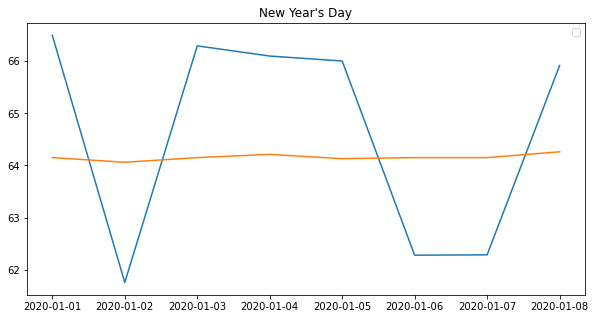

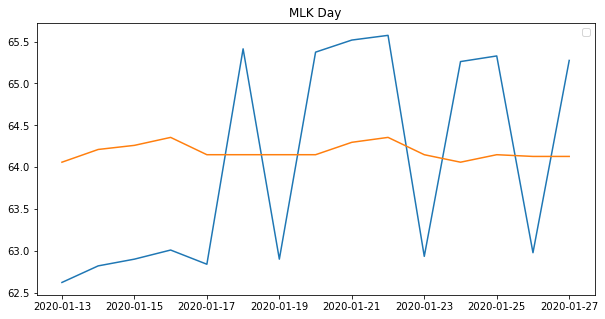

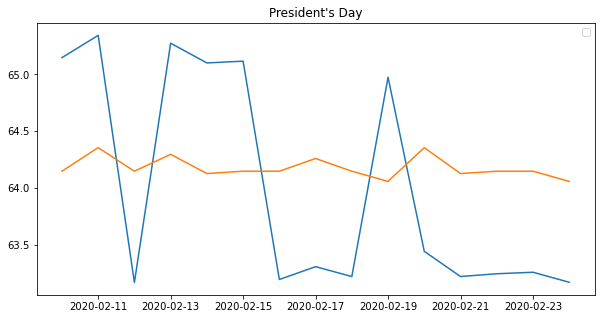

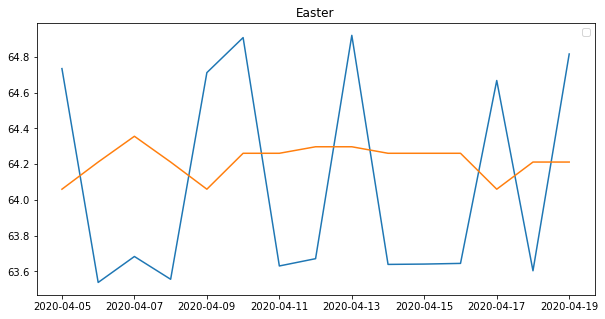

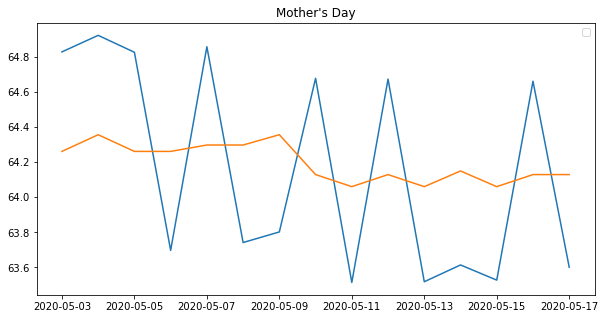

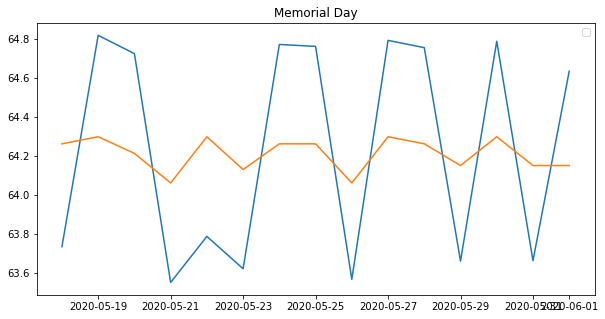

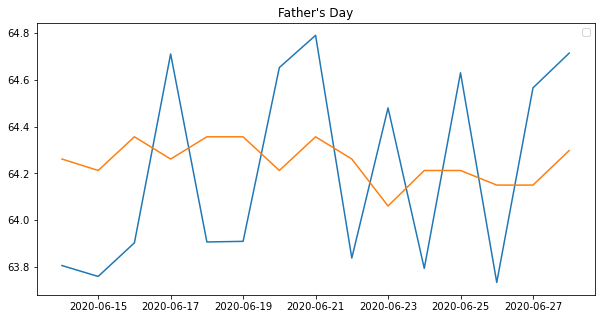

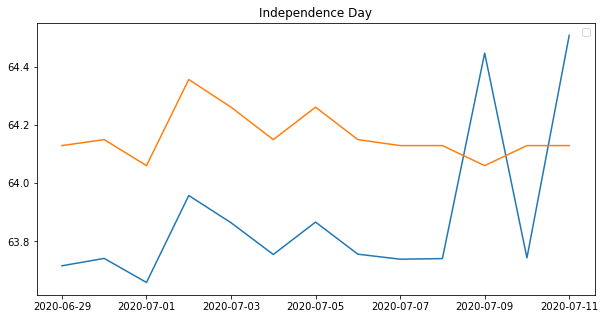

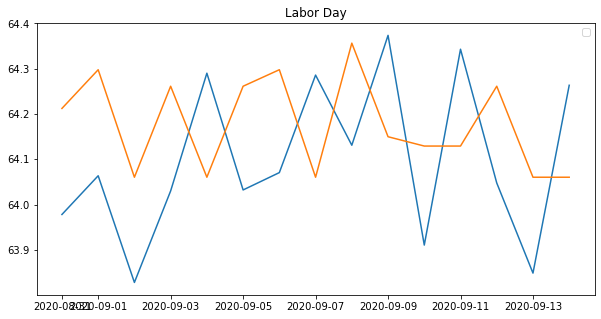

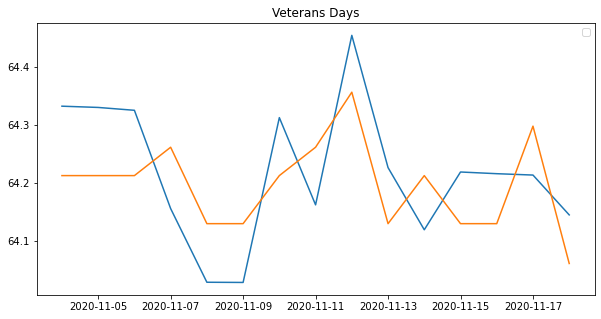

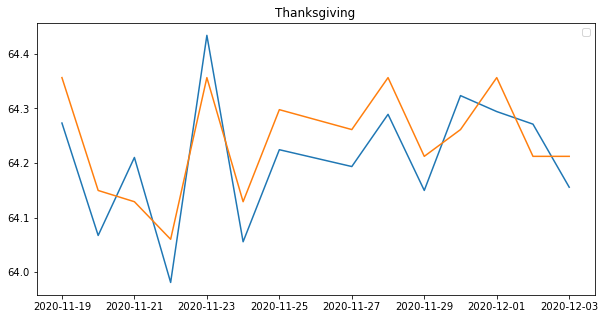

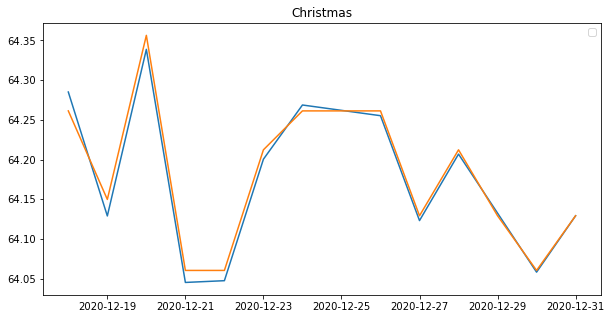

In [171]:
rollback_before_flag = True
rollback_after_flag = True

query = """
select everyday.sale_date,
        everyday.day_name,
        everyday.actual_sales as actual,
        expected.expected_sales as expected,
        (everyday.actual_sales/expected.expected_sales)-1 as difference,
        round(abs((everyday.actual_sales/expected.expected_sales)-1), 5) as absolute
from
        (select sale_date, 
                to_char(sale_date, 'Day') as day_name,
                avg(total_amount) as actual_sales
        from sales
        group by sale_date
        order by sale_date) as everyday
    join
        (select extract(dow from sale_date) as day_number,
                to_char(sale_date, 'Day') as day_name,
                avg(total_amount) as expected_sales
        from sales
        group by day_number, day_name
        order by day_number) as expected
    on everyday.day_name = expected.day_name
order by absolute desc

"""

df_difference = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

df_difference['sale_date']=pd.to_datetime(df['sale_date']).dt.date
df_difference.set_index('sale_date', inplace = True)
df_difference
# df_difference['sale_date'] == datetime.date(2020,1,1)
# df_holidays['sale_date']=pd.to_datetime(df['sale_date'])

holiday_descriptions = df_holidays['description'].tolist()



# holiday_string = [0]
# holiday_date = datetime.datetime.strptime(holiday_string, '%Y-%m-%d')

# results = pd.DataFrame()
appended_stuff = []
for i in range(12):
#     print('i: ' + str(i))
    holiday_date = df_holidays['holiday_date'][i]
#     print('holiday_date: ' + str(holiday_date))
    holiday_description = df_holidays['description'][i]

    # START DATE
    start_date = holiday_date + datetime.timedelta(days=-7)
    if start_date.year < 2020:
        start_date = datetime.datetime(2020,1,1)
    start_date = datetime.date(start_date.year, start_date.month, start_date.day)

    # END DATE
    end_date  = holiday_date + datetime.timedelta(days=+7)
    if end_date.year > 2020:
        end_date = datetime.datetime(2020,12,31)
    end_date = datetime.date(end_date.year, end_date.month, end_date.day)

    new_df = df_difference[(df_difference.index >= start_date) & (df_difference.index <= end_date)]
    new_df.insert(0, 'closest_holiday', holiday_description)
    appended_stuff.append(new_df)
#     results = pd.concat(results, new_df)

# holiday_index = 0

results = pd.concat(appended_stuff)
results = results[~results.index.duplicated(keep='first')]


for holiday_index in range(12):
    results_plot_df = results[results['closest_holiday'] == holiday_descriptions[holiday_index]]
    plt.figure(figsize=(10,5))
    plt.plot(results_plot_df.index.values, results_plot_df['actual'])
    plt.plot(results_plot_df.index.values, results_plot_df['expected'])
    plt.title(holiday_descriptions[holiday_index])
    # plt.xlabel('Month')
    # plt.ylabel('Sales (Millions of Dollars)')
    # plt.ylim(bottom=6, top=10)
    plt.legend()
plt.show()

# print(results[results['closest_holiday'] == holiday_descriptions[holiday_index]]['closest_holiday'].size)
# results[results['closest_holiday'] == holiday_descriptions[holiday_index]]


#     start_date = holiday_date + datetime.timedelta(days=-7)
#     if start_date.year < 2020:
#         start_date = datetime.date(2020,1,1)
#     end_date  = holiday_date + datetime.timedelta(days=+7)
#     if end_date.year > 2020:
#         end_date = datetime.date(2020,12,31)
#     results = pd.concat(results,
#                        df_difference.loc[start_date], df_difference.loc[end_date])
    

# # ================ WORKS ====================
# holiday_date = df_holidays['holiday_date'][0]
# holiday_description = df_holidays['description'][0]
# print(type(holiday_date))
# # START DATE
# start_date = holiday_date + datetime.timedelta(days=-7)
# if start_date.year < 2020:
#     start_date = datetime.datetime(2020,1,1)
# start_date = datetime.date(start_date.year, start_date.month, start_date.day)

# # END DATE
# end_date  = holiday_date + datetime.timedelta(days=+7)
# if end_date.year > 2020:
#     end_date = datetime.datetime(2020,12,31)
# end_date = datetime.date(end_date.year, end_date.month, end_date.day)

# new_df = df_difference[(df_difference.index >= start_date) & (df_difference.index <= end_date)]
# new_df.insert(0, 'closest_holiday', holiday_description)
# new_df
# # ================ WORKS ====================